### About this project
I collected Major League Baseball player and team statistics from Kaggle (https://www.kaggle.com/seanlahman/the-history-of-baseball).  This is a very large dataset, reaching back to the 1800's and including data regarding players, teams, and ball parks.

I reduced the data set to include only players who earned a MLB salary in 2015.  There were over 900 players who were on a MLB team in 2015.  To focus my data on the most active players, I used a well-known Fantasy team ranking to isolate the top 300 players. (http://www.espn.com/fantasy/baseball/story/_/page/mlbdk2k15_ranks_300_points/2015-fantasy-baseball-player-points-rankings-top-300)

There are two main types of baseball players - pitchers and hitters. Because most pitchers will not generate hitting stats similar to their non-pitching teammates, it is not reasonable to compare them on hitting stats.  Pitchers have unique stats that can be analyzed for pitchers only.  Therefore, in the analysis, I separated these players for certain analysis.

Baseball data is very interesting to most sports fans.  The application of stats to the game of baseball can be utilized for fantasy play as well as a deeper enjoyment of the game.  My husband (and now teenage son) are huge baseball fans; they know everything about it - current as well as its deep history.  I decided to use baseball as my data set so they would be willing to talk to me about data science!


### Hypotheses/Questions
Given this set of data in regards to MLB and familiarity with Major League Baseball, I wanted to answer the following questions:

1. Are there more home runs (or hits) in the American League or the National League?
2. Do taller batters hit more home runs or hits? 
3. Do left-handed batters get more hits or home runs than right-handed?
4. Is there a difference (in terms of home runs) between non-pitchers above & below the avg salary?

To determine the answers to these questions, I will begin by visualizing the data sets.  Then, I will compare the data and use the p-value to determine if the difference in means we see is due to a real difference in the population and not due to variability in the samples. 

I'll start by analyzing/describing the data to provide context to my dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import scipy as scipy
from scipy.stats import ttest_ind


%matplotlib inline
dfp  = pd.read_csv("C:/Users/boyerm/Documents/Thinkful/players.csv")
dft  = pd.read_csv("C:/Users/boyerm/Documents/Thinkful/teamsmb.csv")


In [2]:
dfp.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,nameFirst,nameLast,nameGiven,...,Int_Walk.1,Wild_pitches,Hit_batter,Balk,Batters_faced,Ground_fly,R,SH,SF,Double_plays
0,pujolal01,1980,1,16,D.R.,Distrito Nacional,Santo Domingo,Albert,Pujols,Jose Alberto,...,0,0,0,0,0,0,0,0,0,0
1,fieldpr01,1984,5,9,USA,CA,Ontario,Prince,Fielder,Prince Semien,...,0,0,0,0,0,0,0,0,0,0
2,teixema01,1980,4,11,USA,MD,Annapolis,Mark,Teixeira,Mark Charles,...,0,0,0,0,0,0,0,0,0,0
3,mauerjo01,1983,4,19,USA,MN,St. Paul,Joe,Mauer,Joseph Patrick,...,0,0,0,0,0,0,0,0,0,0
4,cabremi01,1983,4,18,Venezuela,Aragua,Maracay,Miguel,Cabrera,Jose Miguel,...,0,0,0,0,0,0,0,0,0,0


In [3]:
dft.head()

,TEAM,Average of salary,Average of # All Star Games,Average of # Awards,Record 2015,Avg Attendance,League,Home Runs,Runs,Earned Runs,Hits,2B,3B,BB,SO,E,Capacity,Avg Att
0,ARI,2132206.897,0.241379,0.413793,0.487654,25680.80247,NL,154,720,659,1494,289,48,490,1312,86,48686,0.527478
1,ATL,2990885.417,0.375000,0.291667,0.413580,24708.54321,NL,100,573,698,1361,251,18,471,1107,90,41149,0.600465
2,BAL,4108744.036,0.642857,0.535714,0.500000,29246.17949,AL,217,713,646,1370,246,20,418,1331,77,45971,0.636188
3,BOS,5659481.250,0.937500,1.093750,0.481481,35564.12346,AL,161,748,694,1495,294,33,478,1148,97,37731,0.942570
4,CHA,4161988.889,0.407407,0.296296,0.469136,21676.66667,AL,136,622,643,1381,260,27,404,1231,101,40615,0.533711


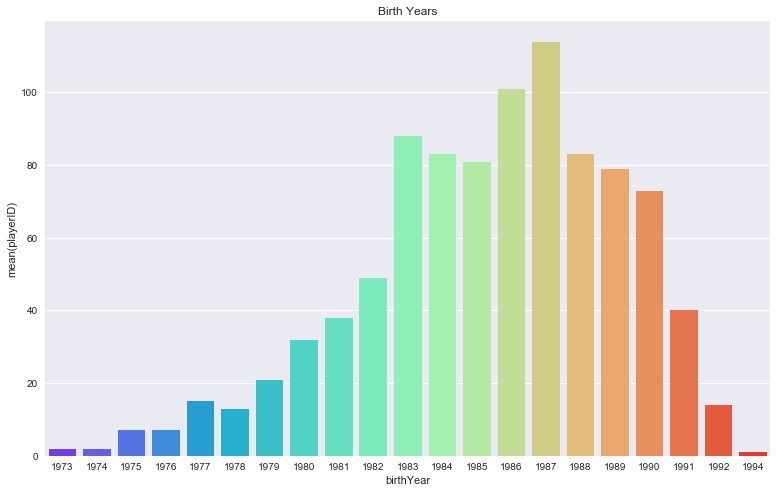

In [4]:
# Summary statistics:
# Looking at the ages of the players

s = dfp.groupby('birthYear').count()['playerID'].sort_values(ascending=False).head(21)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Birth Years")
plt.show()

Most of the MLB players in 2015 were born in 1987, so most of the players were 28 years old.

This data is left-skewed.

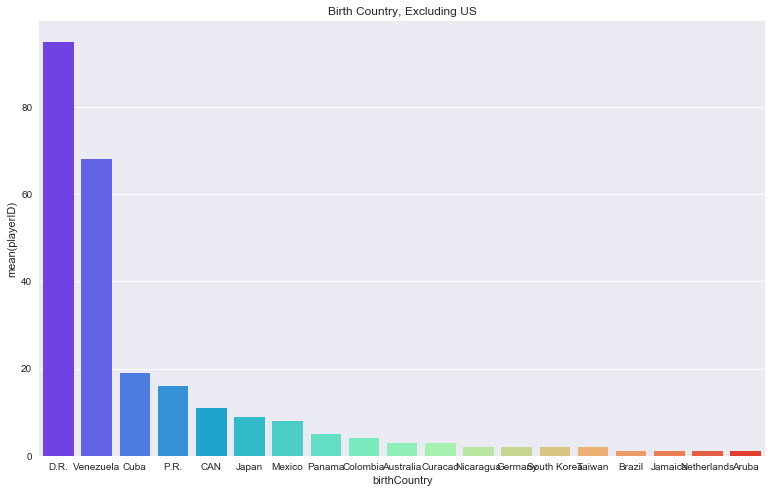

In [5]:
# Where are the players from?

s = dfp.groupby('birthCountry').count()['playerID'].sort_values(ascending=False).head(21)[1:]
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Birth Country, Excluding US")
plt.show()

The Dominican Republic is the second highest source of MLB players.

In [6]:
# Salary stats:

print("The average salary for an MLB player in 2015 was $" + str(round(dfp['2015 Salary'].mean()/1000000,1)) + " Million.")
print("The lowest salary for an MLB player in 2015 was $" + str(round(dfp['2015 Salary'].min()/1000000,1)) + " Million.")
print("The highest salary for an MLB player in 2015 was $" + str(round(dfp['2015 Salary'].max()/1000000,1)) + " Million.")
print("The median salary for an MLB player in 2015 was $" + str(round(dfp['2015 Salary'].median()/1000000,1)) + " Million.")


The average salary for an MLB player in 2015 was $4.3 Million.
The lowest salary for an MLB player in 2015 was $0.5 Million.
The highest salary for an MLB player in 2015 was $32.6 Million.
The median salary for an MLB player in 2015 was $1.9 Million.


Baseball players make a lot of money!! However, you can see there is a lot of variation between the highest and lowest paid players.
After 3 full big league seasons, players are arbitration-eligible (which means you can arbitrate to get a higher salary).  There are exceptions for the very best players where teams will give the player a contract pre-arbitration.  This reduces the risk that the player goes to arbitration where statisticians will pick an appropriate salary based on comparable players.  This process is both risky and can be a little contensious, leading to possible bad-blood between the team and their highly valued player.

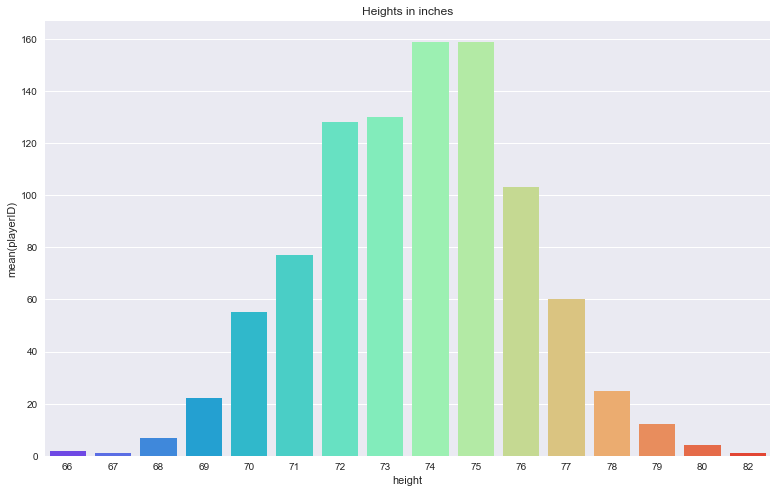

In [7]:
# Distribution of heights among players in 2015

s = dfp.groupby('height').count()['playerID'].sort_values(ascending=False)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Heights in inches")
plt.show()

Most players are 6'2" or 6'3" tall. The average height of an adult male is 5'10" (70 inches). Almost all MLB players are taller than the average male!

#### Question 1. Are there more home runs (or hits) in the American League or the National League?

First, I'll create separate data frames for each League and create a histogram of the teams' results.  I will compare the means with a t-test and determine p-value and from that, determine statistical significance.

My hypothesis is that there will be more home runs in the AL because they use a Designated Hitter (instead of using the pitcher in the line up). Having one extra hitter in the rotation should lead to more home runs.

In [8]:
AL = dft[dft['League']=="AL"] #create dataframe of the AL
NL = dft[dft['League']=="NL"] #create dataframe of the NL


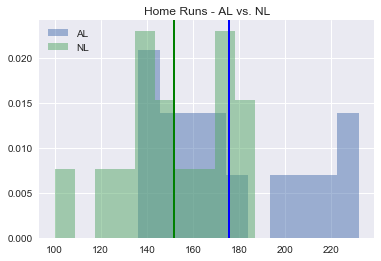

In [9]:
# Are there more home runs in the American League or the National League?
plt.hist(AL['Home Runs'], label = 'AL', alpha = 0.5, normed = True)
plt.axvline(AL['Home Runs'].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Home Runs - AL vs. NL')
plt.hist(NL['Home Runs'], label = 'NL', alpha = 0.5, normed = True)
plt.axvline(NL['Home Runs'].mean(), color='g', linestyle='solid', linewidth=2)
plt.legend(loc='upper left')
plt.show()

In [10]:
print(round(AL['Home Runs'].mean(),0))
print(round((NL['Home Runs'].mean()),0))


176.0
152.0


In the visualization above, you can see there are a few American League teams that are much higher than the AL mean and a few NL teams that are much lower than the NL mean.  The question remains as to whether these diffferences are statistically significant. I will use the p-test to determine this.

By visualizing the data, I can tell that the data is not normally distributed. Therefore, I will try to use the Mann-Whitney U test which works for this type of data. 

In [11]:
scipy.stats.mannwhitneyu(AL['Home Runs'],(NL['Home Runs']))

MannwhitneyuResult(statistic=71.0, pvalue=0.044455669784965332)

Likely due to the Designated Hitter in the American League, the average number of home runs in the AL is 24 more than the NL.  Because the p-value is < 0.05, we reject the null hypothese and conclude that there is a statistically significant difference between total home runs by NL teams and AL teams.  

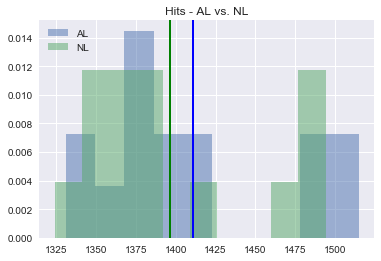

In [12]:
# Same question for HITS:

plt.hist(AL['Hits'], label = 'AL', alpha = 0.5, normed = True)
plt.axvline(AL['Hits'].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Hits - AL vs. NL')
plt.hist(NL['Hits'], label = 'NL', alpha = 0.5, normed = True)
plt.axvline(NL['Hits'].mean(), color='g', linestyle='solid', linewidth=2)
plt.legend(loc='upper left')
plt.show()

In [13]:
scipy.stats.mannwhitneyu(AL['Hits'], NL['Hits'])

MannwhitneyuResult(statistic=86.5, pvalue=0.14507140117701744)

The p-value is > 0.05, therefore there's no difference between total hits by NL teams and AL teams.

#### Question 2. Do taller guys hit more home runs or hits? 

My hypothesis is that the taller guys do hit more home runs (removing pitchers who are usually very tall).  However, I don't think taller guys get more hits.

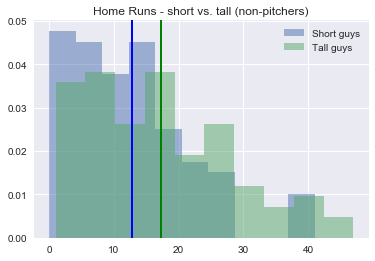

In [14]:
# Do taller guys hit more home runs? USe only top 300 players, defined by ESPN fantasy rank
hvar = 'HR'
Top = dfp[np.isfinite(dfp['Fantasy_pos'])]   # top 300
L = Top[Top['Key_pos']!= 'P' ]       #remove pitchers
L = L[L['height']<=L['height'].mean()]  # less than mean height of top 300, non-pitchers

H = Top[Top['Key_pos']!= 'P']
H = H[H['height']>H['height'].mean()]


plt.hist(L[hvar], label = 'Short guys', alpha = 0.5, normed = True)
plt.axvline(L[hvar].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Home Runs - short vs. tall (non-pitchers)')
plt.hist(H[hvar], label = 'Tall guys', alpha = 0.5, normed = True)
plt.axvline(H[hvar].mean(), color='g', linestyle='solid', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [15]:
scipy.stats.mannwhitneyu(L[hvar], H[hvar])

MannwhitneyuResult(statistic=3348.5, pvalue=0.0021384339305689005)

In [16]:
print(L['HR'].mean())
print(H['HR'].mean())

12.742268041237113
17.296703296703296


For the top 300 players (as defined by ESPN Fantasy rankings in 2015), taller players do get more home runs (P<= 0.05).

This data appears to be right-skewed where there is a longer tail to the right, especially the tall guys.  There are a few tall guys who hit a high number of home runs (> 30) which increases the average home runs for tall guys.

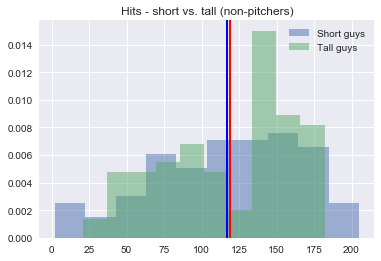

In [17]:
# Do taller guys get more hits? (use top 300 players as defined by Fantasy Rank), non-pitchers
hvar = 'Hits'

plt.hist(L[hvar], label = 'Short guys', alpha = 0.5, normed = True)
plt.axvline(L[hvar].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Hits - short vs. tall (non-pitchers)')
plt.hist(H[hvar], label = 'Tall guys', alpha = 0.5, normed = True)
plt.axvline(H[hvar].mean(), color='r', linestyle='solid', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [18]:
scipy.stats.mannwhitneyu(L[hvar], H[hvar])

MannwhitneyuResult(statistic=4342.5, pvalue=0.42501094045961652)

For the top 300 players (as defined by ESPN Fantasy rankings in 2015), taller players do NOT get more hits (P> 0.05)

#### Question 3. Do left-handed guys get more hits or home runs than right-handed?

It is likely that a LH hitter is going to face a RH pitcher (based on the predominance of RH pitchers in the MLB).  LH Hitters have a slight advantage because they have an extra second to see the ball before it arrives, they also are a step closer to 1st base and since they are less prominent in the league, fielders have less experience fielding lefties' hits.

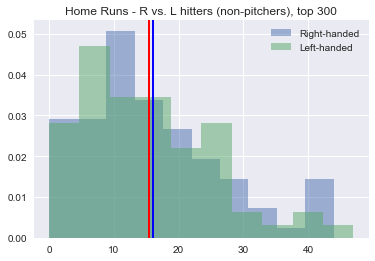

In [19]:
# Right-handed hitters vs. Left-handed?
# For HR
hvar = 'HR'

R = Top[Top['bats']=='R'] #top only
R = R[R['Key_pos']!= 'P' ]       #remove pitchers

LE = Top[Top['bats']=='L']
LE = LE[LE['Key_pos']!= 'P']


plt.hist(R[hvar], label = 'Right-handed', alpha = 0.5, normed = True)
plt.axvline(R[hvar].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Home Runs - R vs. L hitters (non-pitchers), top 300')
plt.hist(LE[hvar], label = 'Left-handed', alpha = 0.5, normed = True)
plt.axvline(LE[hvar].mean(), color='r', linestyle='solid', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [20]:
scipy.stats.mannwhitneyu(R[hvar], LE[hvar])

MannwhitneyuResult(statistic=3085.0, pvalue=0.35373007826495584)

Even with all of my conventional wisdom above, I just proved that there is no difference in RH vs LH players for Home Runs (top 300). Mind-blowing!!
This data is also right-skewed but this time, the RH and LH players are both represented in the tail where there are more home runs.

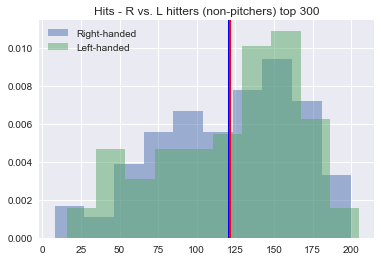

In [21]:
# For Hits
hvar = 'Hits'

plt.hist(R[hvar], label = 'Right-handed', alpha = 0.5, normed = True)
plt.axvline(R[hvar].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Hits - R vs. L hitters (non-pitchers) top 300')
plt.hist(LE[hvar], label = 'Left-handed', alpha = 0.5, normed = True)
plt.axvline(LE[hvar].mean(), color='r', linestyle='solid', linewidth=2)
plt.legend(loc='upper left')
plt.show()

In [22]:
scipy.stats.mannwhitneyu(R[hvar], LE[hvar])

MannwhitneyuResult(statistic=3117.5, pvalue=0.39560824846151255)

There is also no difference in  LH and RH players (top 300) for hits.  But this time, the data is right-skewed.  Likely there is a left tail because it's more unlikely for a top 300 hitter to get very few hits since that's the bread and butter of a MLB big league player.

#### Question 4. Is there a difference (in terms of home runs) between non-pitchers above & below the avg salary?

This should be an easy one - OF COURSE if you get paid more, you should get more home runs! Right?!

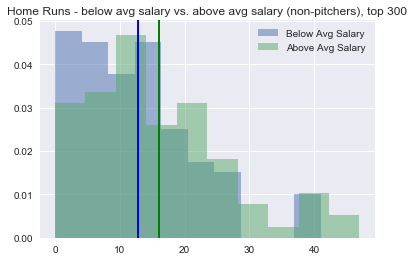

In [23]:
# Home runs - above or below salary
hvar = 'HR'

LS = Top[Top['Key_pos']!= 'P' ]       #removes pitchers
LS = LS[LS['2015 Salary']<=LS['2015 Salary'].mean()] # Less than avg sal of top 300


H = Top[Top['Key_pos']!= 'P']
H = H[H['2015 Salary']>H['2015 Salary'].mean()] 


plt.hist(L[hvar], label = 'Below Avg Salary', alpha = 0.5, normed = True)
plt.axvline(L[hvar].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Home Runs - below avg salary vs. above avg salary (non-pitchers), top 300')
plt.hist(H[hvar], label = 'Above Avg Salary', alpha = 0.5, normed = True)
plt.axvline(H[hvar].mean(), color='g', linestyle='solid', linewidth=2)
plt.legend(loc='upper right')
plt.show()


In [24]:
scipy.stats.mannwhitneyu(LS[hvar], H[hvar])

MannwhitneyuResult(statistic=3864.5, pvalue=0.096641175655152844)

Hmmmm, no difference between those above & below the avg salary of the non-pitchers, top 300 players! What do they pay them for? :)
A possible explanation is that players peak at a certain age (usually around 27-28) but since during these first few years there salary is much lower (pre-arbitration eligible), the performance and salary do not align. Additionally, the older players who may be past their peak performance are still paid at the same level as when they were at their past performance (possibly they are still under the same multi-year hundred million dollar contract but they are at the end of their productive career either through age, injury or other physical weardown). Unlike corporate jobs like ours, baseball players' performance will wane while their salary does not.

I want to dig into salary a little bit more
Let's look at the average salary by position.

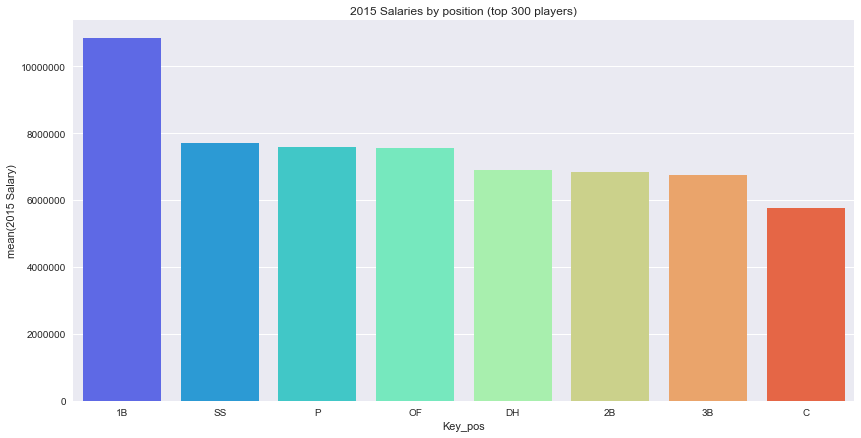

In [25]:
s = dfp.groupby('Key_pos').mean()['2015 Salary'].sort_values(ascending=False)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(14,7)
g.set_title("2015 Salaries by position (top 300 players)")
plt.ticklabel_format(style='plain', axis='y')

Hmmm, pays to be a first baseman. This probably has more to do with their offense.  Short stop is the highest paid player who contributes on defense. 

Which position gets the most hits?

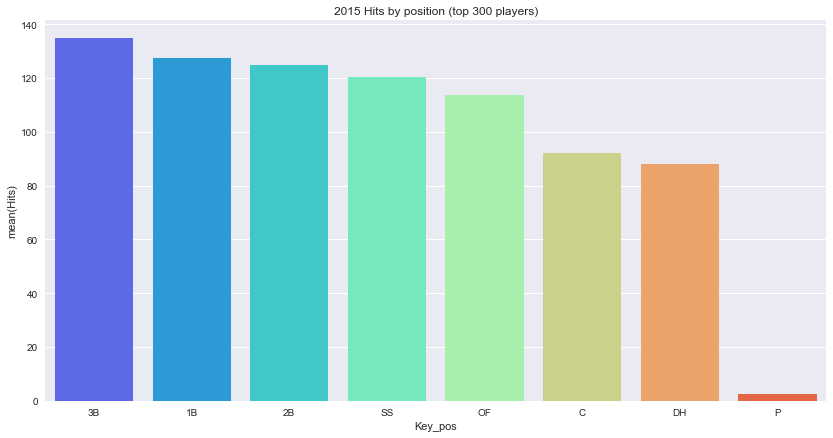

In [26]:
#Which position gets the most hits?
s = dfp.groupby('Key_pos').mean()['Hits'].sort_values(ascending=False)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(14,7)
g.set_title("2015 Hits by position (top 300 players)")
plt.ticklabel_format(style='plain', axis='y')

Third basemen get the most hits, but it's all pretty close between the infielders.

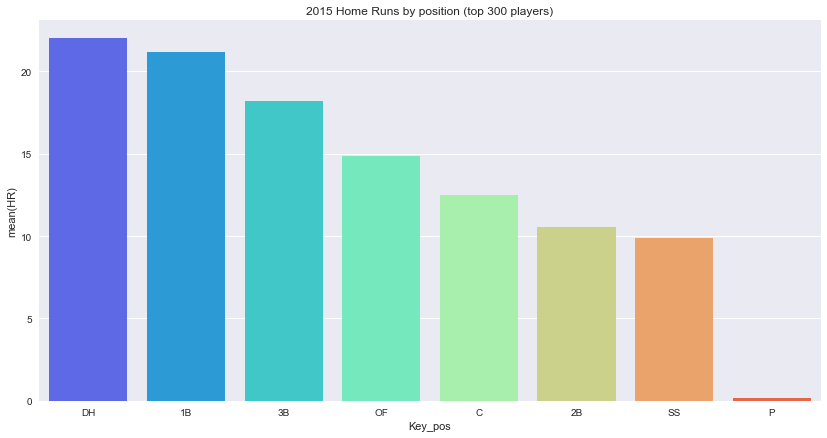

In [27]:
s = dfp.groupby('Key_pos').mean()['HR'].sort_values(ascending=False)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(14,7)
g.set_title("2015 Home Runs by position (top 300 players)")
plt.ticklabel_format(style='plain', axis='y')

No surprise that the DH gets a lot of home runs, what else are they good for?!

I've mentioned salary & age above, now I'd like to see how average salary varies by the players' age. Additionally, how much of a premium is paid to the top 300 players?

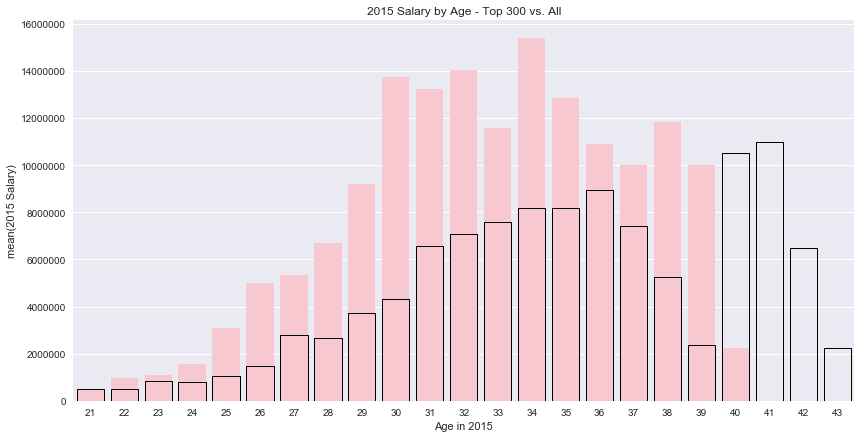

In [28]:
# Compare the salaries of the top 300 to all players - split by age
sns.set_context(rc = {'patch.linewidth': 1.0})
Top = dfp[np.isfinite(dfp['Fantasy_pos'])]   # top 300
s = Top.groupby('Age in 2015').mean()['2015 Salary'].sort_values(ascending=False)
g = sns.barplot(s.index, s,color="pink", fill=True)
g.figure.set_size_inches(14,7)
g.set_title("2015 Salary by Age - Top 300 vs. All")
plt.ticklabel_format(style='plain', axis='y')

AllP = dfp.groupby('Age in 2015').mean()['2015 Salary'].sort_values(ascending=False)
g = sns.barplot(AllP.index, AllP,color="green", fill = False)
g.figure.set_size_inches(14,7)
plt.ticklabel_format(style='plain', axis='y')

This graph is really interesting to me for a few reasons:
1) it's pretty impressive how much higher the salary is for the top 300 (in pink) vs. the avg player (by age).
2) There's obviously not a lot of top ranked baseball players who are over 40 but they make a lot of money on average!
There are some well-recognized players over 40 (A-rod, Ichiro, Bartolo Colon) that make up this esteemed elderly group - players clearly being paid for what they've done, not what they've got left to do.
3) While not a smooth distribution, average players (not the top 300) appear to peak in salary around 36 years old (except the few older guys mentioned in 2 above).  Top ranked players' salaries peak earlier in their career (early 30s).  

I am also wondering, what is the share of each position among the top 300 players in 2015?

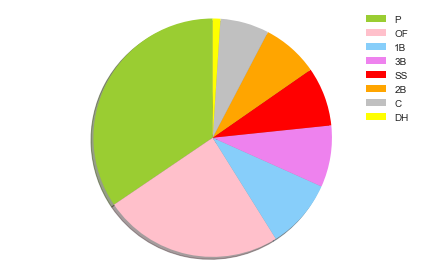

In [29]:
import matplotlib.pyplot as plt
 
pos = Top[['Key_pos','playerID']] # top 300 players by position
team = pos.groupby(['Key_pos']).count()['playerID'].sort_values(ascending=False)

labels = ('P','OF','1B','3B','SS','2B','C','DH')
sizes = team
colors = ['yellowgreen', 'pink', 'lightskyblue', 'violet', 'red', 'orange', 'silver','yellow']
patches, texts = plt.pie(sizes,  colors = colors, shadow=True, startangle=90)
plt.legend(patches,labels,  loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

Interesting, about one-third of the top 300 players are pitchers.  Another 25% are outfielders (which makes sense since this is actually 3 different positions AND outfielders are usually pretty good players!).  The smallest % is designated hitters. This makes sense since only 1/2 of the teams have DH's.  The other positions have about equal share of the top 300.

I'd love to know what determines the salary of a MLB player (is there any logic to it? if so, what is it?)

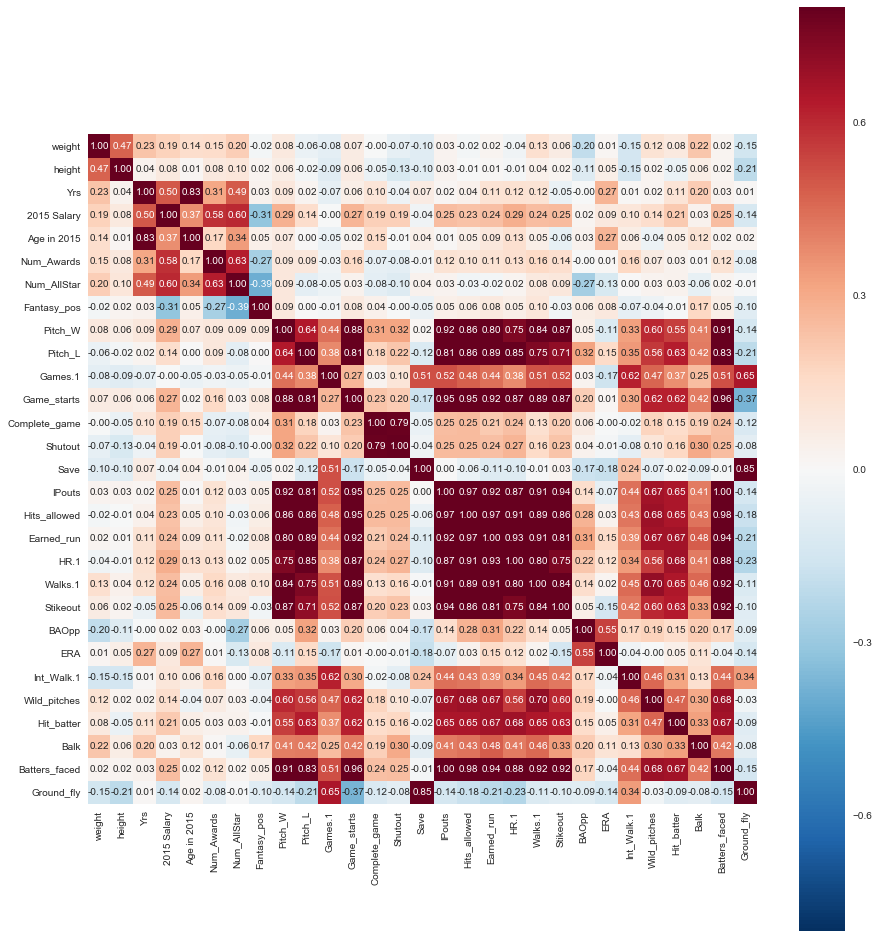

In [30]:
dfpp = Top[Top['Key_pos']=='P']    # create table of pitchers (top 300)
dfpp = dfpp[['playerID', 'nameFirst', 'nameLast', 'nameGiven',
       'weight', 'height', 'bats', 'throws',  'retroID',
       'bbrefID',  'Yrs', '2015 Salary', 'Age in 2015', 'Num_Awards',
       'Num_AllStar', 'Fantasy_pos','Player_team', 'Player_League', 'Key_positions', 'Key_pos', 'Pitch_W', 'Pitch_L', 'Games.1', 'Game_starts',
       'Complete_game', 'Shutout', 'Save', 'IPouts', 'Hits_allowed',
       'Earned_run', 'HR.1', 'Walks.1', 'Stikeout', 'BAOpp', 'ERA',
       'Int_Walk.1', 'Wild_pitches', 'Hit_batter', 'Balk', 'Batters_faced',
       'Ground_fly']]
corrmat = dfpp.corr() 
f, ax = plt.subplots(figsize=(15, 17))
# Draw the heatmap using seaborn to see what is correlated 
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')
plt.show()

I wanted to use this pitchers' correlation matrix to see what is correlated with salary. There are several key indicators that salary is positively corellated wtih: tenure-related metrics (age, # of years playing in the major league), and performance indicators like number of all star games, number of awards, ERA, Number of Complete Games, Wins, Shut outs, Number of batters faced, Innings Pitched, Strike Outs - mostly obvious metrics but I think it would be interesting to understand what the key drivers are. 

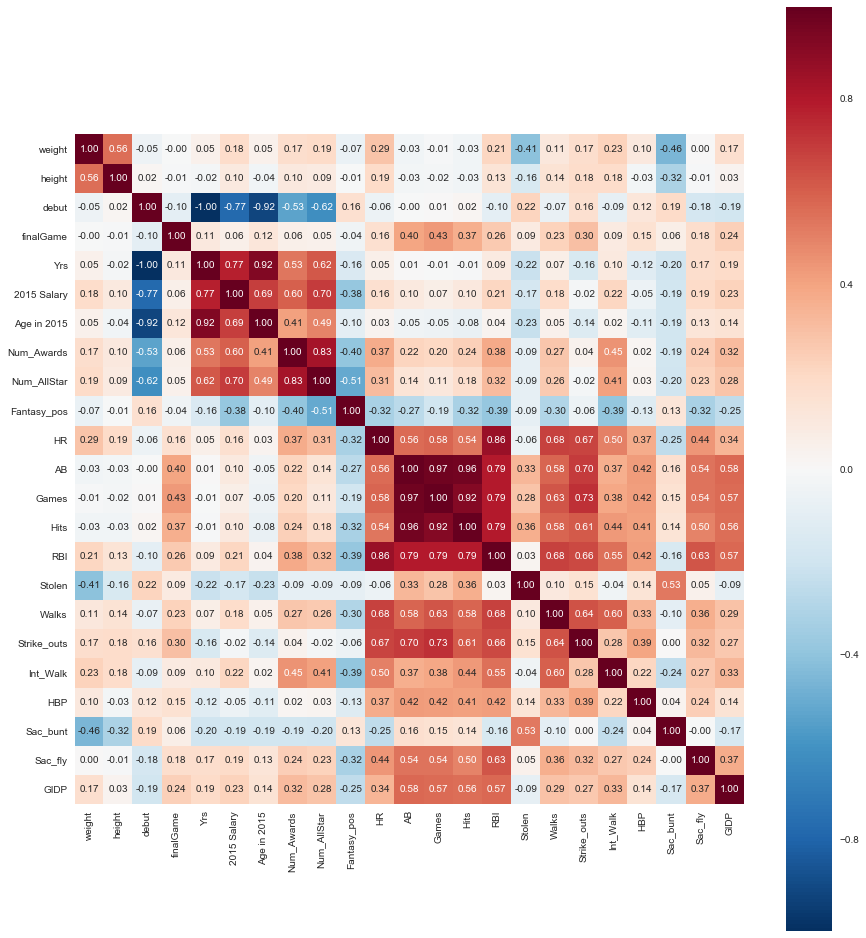

In [31]:
dfph = Top[Top['Key_pos']!='P']   # top 300 non-pitchers
dfph = dfph[['playerID', 'birthCountry',
       'birthState', 'birthCity', 'nameFirst', 'nameLast', 'nameGiven',
       'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID',
       'bbrefID',  'Yrs', '2015 Salary', 'Age in 2015', 'Num_Awards',
       'Num_AllStar', 'Fantasy_pos', 'HR', 'AB', 'Games', 'Hits',
       'Player_team', 'Player_League', 'Key_positions', 'Key_pos', 'RBI',
       'Stolen',  'Walks', 'Strike_outs', 'Int_Walk', 'HBP', 'Sac_bunt',
       'Sac_fly', 'GIDP']]

corrmat = dfph.corr() 
f, ax = plt.subplots(figsize=(15, 17))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')
plt.show()

For hitters, similar factors are impacting salary: tenure, age and performance metrics like RBI, HR, and intentional walks. The negative correlation with fantasy rank is because the lower rank means the better player.
You can see there is a positive correlation between HRs and intentional walks - likely because the pitcher wants to avoid giving the hitter a chance to hit a home run. Home run hitters don't steal a lot of bases (which makes sense as they are not on the bases as much as others! but also could be related to speed - i.e., big hitters are bigger guys who don't effectively steal bases). Good news for them is that stealing bases is negatively correlated with salary.
There is a lot of interesting data here and I'd want to dig deeper into these metrics as a ratio to innings/games played as well as look at it over multiple years.

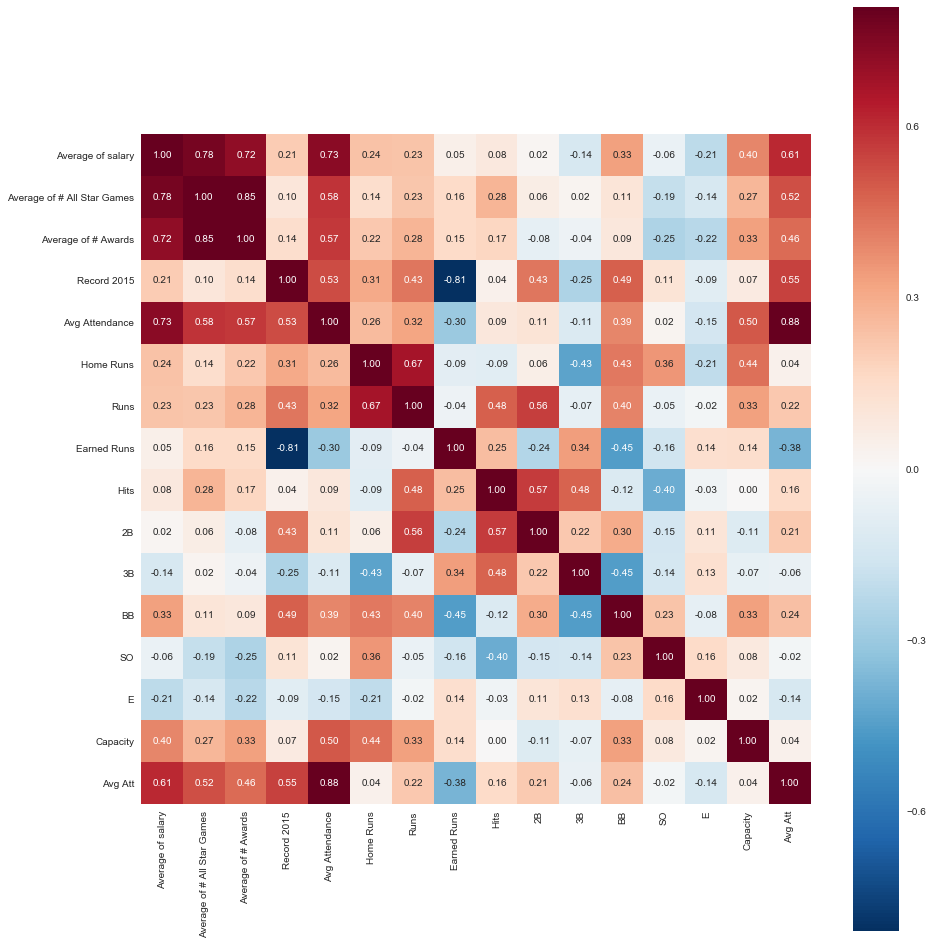

In [32]:
corrmat = dft.corr() 
f, ax = plt.subplots(figsize=(15, 17))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')
plt.show()

This is a team correlation matrix. I would like to better understand what influences the team's record and fan attendance. You can see that a better winning record correlates with attendance, as does having a team filled with All Stars and award winners.  Luckily for the team owners, the average salary of players correlates with higher attendance.  My experience tells me that when an owner is cheap and gets less known/lower performing players, the fans don't show up.  Attendance is negatively correlated with metrics like Errors (E) and Earned Runs - which makes sense as fans don't want to see that after shelling out hundreds of dollars to go to the ballpark.

#### Conclusion


I learned a lot by analyzing the 2015 baseball player, salary and team data.  I also disproved some common misconceptions about baseball stats (at least for this year).  I set out to figure out the answers from four questions:
    1. Are there more home runs (or hits) in the American League or the National League?
    
    Turns out there is a difference in Home Runs because the leagues have different rules around the designated hitter which impacts the average home runs.  The number of hits is not statistically different between the AL and NL.  
    
    2. Do taller batters hit more home runs or hits? 
    
    I was right about the tall guys hitting more homeruns but not more runs.
    
    3. Do left-handed batters get more hits or home runs than right-handed?
    
    I thought that left-handed players would get more HRs and hits than right-handed batters but neither are true.
    
    4. Is there a difference (in terms of home runs) between non-pitchers above & below the avg salary?
    
    This one is the most surprising to me which caused me to dig deeper into salaries.  The performance of the player (hits, HR) is not dependent on whether the batter is above or below the average salary.  This is impacted by several factors that I explored above, including age (where age/tenure increases salary but performance begins to wane over time).

The insight here is that salary is as much a function of age/tenure/experience as it is performance. That is, in any given years, there are several players that have had storied baseball careers and are under multi-year, multi-million dollar contracts.  Their performance peaks at some point during that contract but inevitably, as the player ages and/or gets injured, their performance wanes while their salary is still locked in.  Baseball players are paid for their potential (once they are able to negotiate), then paid for their past performance as they age.  Therefore, at any point in time, some players are underpaid (still under their rookie contract) and some are overpaid (paid for their past performance).  This is a function of the MLB player's union, which is set up to reward seniority.
    
In the future, I want to better understand what influences an individual player's salary beyond tenure. I'd like to translate the correlation matrices into a predictive model for salaries.  From a team perspective, I'd like to help a team predict what makes a winning team and maybe more importantly, get their best team for the money.  It would also be interesting to follow players over time to understand the impact of the age and performance with salary and see what the inflection point is between their salary increasing and their performance decreasing.

